Imports

In [425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

from trendlines import fit_trendlines_single
from trendlines import mapear_retas_com_bottoms
from trendlines import mapear_retas_com_tops
from trendlines import identifica_retas_similares_suporte
from trendlines import identifica_retas_similares_resistencia
from tops_e_bottoms import checa_tops
from tops_e_bottoms import checa_bottoms
from calcula_RSI import compute_rsi

Setando variáveis e carregando dados

In [426]:
# janela_rsi determina o número de períodos em que os parâmetros são calculados
janela_rsi = 21

# ordem determina quantos pontos à direita e à esquerda examinamos para determina pontos de máximo (tops) e mínimos (bottoms) locais
ordem = 5

# lookback determina quantos pontos para trás vamos olhar para desenharmos as primeiras tentativas de retas de suporte e resistência
lookback1 = 50
lookback2 = 100
lookback3 = 200
lookback4 = 300

# distancia_maxima determina a distancia máxima na vertical que uma linha deve passar para considerar que passou pelo ponto
distancia_maxima = 3

# num_pontos determina quantos pontos queremos na linha de tendência no mínimo
num_pontos = 3

# ind_indice determina quais variáveis vamos usar para fazer o estudo:
# 1 = bitcoin
# 2 = ibov
# 3 = S&P 500
# 4 = FTSE All Share
# 5  = DAX
# 6 = Nikkei 225

# break_min determina a distãncia mínima na veritia do ropomimento para uma reta ser considerada rompida
break_min = 4
# pontos_para_tras determina quantos pontos para trás eu checo o rompimento
pontos_para_tras = 6

# sl = stop loss e pt = profit taking
sl = -0.02
pt = 0.06

# Escolha do ativo
ind_indice = 2

# datas do intervalo sendo avaliado
start_date = "2011-01-01"
end_date = "2018-12-31"

Carregando dados

In [427]:
indices = {
    1: "BTC-USD",    # Ticker para Bitcoin
    2: "^BVSP",      # Ticker para Ibovespa
    3: "^GSPC",      # Ticker para S&P 500
    4: "^FTSE",      # Ticker para FTSE All Share
    5: "^GDAXI",     # Ticker para DAX
    6: "^N225"       # Ticker para Nikkei 225
}

ticker = indices.get(ind_indice)
if ticker:
    data = yf.download(ticker, start=start_date, end=end_date)
else:
    print("Índice inválido")

# Take natural log of data to resolve price scaling issues
data_log = np.log(data)

data.to_csv('dados_csv_produzidos/data.csv', index=True)


[*********************100%%**********************]  1 of 1 completed


C:\Users\fabio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


Cálculo do RSI

In [428]:


data['RSI'] = compute_rsi(data_log['Close'],janela_rsi)
rsi_values = compute_rsi(data_log['Close'], janela_rsi)

close_df = pd.DataFrame(data_log['Close'])

rsi_df = pd.DataFrame(data['RSI'])
rsi_df.to_csv('dados_csv_produzidos/rsi_values.csv', index=True)

Date
2011-01-03         NaN
2011-01-04         NaN
2011-01-05         NaN
2011-01-06         NaN
2011-01-07         NaN
                ...   
2018-12-20    0.005041
2018-12-21    0.005041
2018-12-26    0.004670
2018-12-27    0.004291
2018-12-28    0.004291
Name: Close, Length: 1976, dtype: float64
Date
2011-01-03         NaN
2011-01-04         NaN
2011-01-05         NaN
2011-01-06         NaN
2011-01-07         NaN
                ...   
2018-12-20    0.005041
2018-12-21    0.005041
2018-12-26    0.004670
2018-12-27    0.004291
2018-12-28    0.004291
Name: Close, Length: 1976, dtype: float64


Encontrando Topos e Fundos do RSI

In [429]:
tops = []
bottoms = []

for i in range(len(data['RSI'])):
    if checa_tops(data['RSI'], i, ordem):
        # top[0] = confirmation index
        # top[1] = index of top
        # top[2] = price of top
        top = [i, i - ordem, data['RSI'][i - ordem]]
        tops.append(top)
    
    if checa_bottoms(data['RSI'], i, ordem):
        # bottom[0] = confirmation index
        # bottom[1] = index of bottom
        # bottom[2] = price of bottom
        bottom = [i, i - ordem, data['RSI'][i - ordem]]
        bottoms.append(bottom)

tops_df = pd.DataFrame(tops, columns=['conf_idx', 'top_idx', 'top_price'])
tops_df = tops_df.dropna(subset=['top_price'])
tops_df.to_csv('dados_csv_produzidos/topos.csv', index=True)

bottoms_df = pd.DataFrame(bottoms, columns=['conf_idx', 'bottom_idx', 'bottom_price'])
bottoms_df = bottoms_df.dropna(subset=['bottom_price'])
bottoms_df.to_csv('dados_csv_produzidos/bottoms.csv', index=True)



c:\Users\fabio\Dropbox\FGV\Curso Estratégias de Trading\Lista 2 PC\Lista-2\tops_e_bottoms.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  v = data[k]
c:\Users\fabio\Dropbox\FGV\Curso Estratégias de Trading\Lista 2 PC\Lista-2\tops_e_bottoms.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data[k + i] > v or data[k - i] > v:
C:\Users\fabio\AppData\Local\Temp\ipykernel_20724\230696207.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

Primeiro gráfico meu_grafico_0

C:\Users\fabio\AppData\Local\Temp\ipykernel_20724\3318231511.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.plot(idx[top.top_idx], data['RSI'][top.top_idx], marker='o', color='green', markersize=1)
C:\Users\fabio\AppData\Local\Temp\ipykernel_20724\3318231511.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.plot(idx[bottom.bottom_idx], data['RSI'][bottom.bottom_idx], marker='o', color='red', markersize=1)


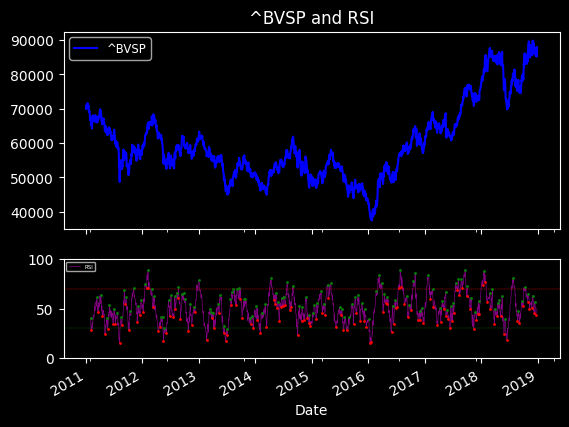

In [430]:
idx = data.index

plt.style.use('dark_background')
fig, (ax1, ax3) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# Plotando o preço de fechamento
data['Close'].plot(ax=ax1, color='blue', label=ticker)

# Plotando o RSI
data['RSI'].plot(ax=ax3, color='purple', label='RSI', linewidth = 0.5)
ax3.axhline(70, color='red', linestyle='--', linewidth = 0.3)  # Linha de sobrecompra
ax3.axhline(30, color='green', linestyle='--', linewidth = 0.3)  # Linha de sobrevenda

plt.legend()
ax1.set_title(ticker + " and RSI")
ax1.legend(loc='upper left', fontsize='small')
ax3.legend(loc='upper left', fontsize=4)
ax3.set_ylim([0, 100])  # O RSI varia de 0 a 100

# Plotar os topos e fundos no gráfico
for top in tops_df.itertuples():
    # Plotar cada topo no gráfico RSI usando a data correspondente
    ax3.plot(idx[top.top_idx], data['RSI'][top.top_idx], marker='o', color='green', markersize=1)

for bottom in bottoms_df.itertuples():
    # Plotar cada fundo no gráfico RSI usando a data correspondente
    ax3.plot(idx[bottom.bottom_idx], data['RSI'][bottom.bottom_idx], marker='o', color='red', markersize=1)


fig.savefig('meu_grafico_0.png', dpi=300)  # Salva a figura como um arquivo PNG com alta resolução

plt.show()

Construção das retas de suporte para as janelas de observação

In [431]:

# Parâmetro
contador_janela = 0
borda_esquerda = bottoms_df['bottom_idx'].iloc[0]

# Inicializar DataFrames
support_slope = [np.nan] * len(rsi_values)
colunas_suporte = ['indice', 'indice_original_lower_pivot', 'valor_rsi', 'support_slope', 'support_intercept', 'inicio_janela', 'fim_janela']
trendlines_suporte_df = pd.DataFrame(columns=colunas_suporte)

for x in [lookback1, lookback2, lookback3, lookback4]:
    lookback = x
    borda_esquerda = bottoms_df['bottom_idx'].iloc[0]
    while borda_esquerda + lookback < len(rsi_values):
        # Chamar a função fit_trendlines_single para a janela sendo avaliada
        lower_pivot, support_slope, upper_pivot, resist_slope = fit_trendlines_single(rsi_values[borda_esquerda:borda_esquerda+lookback - 1])
        lower_pivot = lower_pivot + borda_esquerda
        valor_rsi = data['RSI'].iloc[lower_pivot]
        suport_intercept = data['RSI'].iloc[lower_pivot] - lower_pivot * support_slope
        nova_linha_suporte = {
            'indice': contador_janela,
            'indice_original_lower_pivot': lower_pivot,
            'valor_rsi': valor_rsi,
            'support_slope': support_slope,
            'support_intercept':suport_intercept,
            'inicio_janela': borda_esquerda,
            'fim_janela':borda_esquerda + lookback - 1
        }
        trendlines_suporte_df = trendlines_suporte_df._append(nova_linha_suporte, ignore_index=True)

        try:
            proximo_esquerda = bottoms_df.loc[bottoms_df['bottom_idx'].gt(borda_esquerda), 'bottom_idx'].min()
            rolagem_1 = proximo_esquerda - borda_esquerda
        except IndexError:
            proximo_esquerda = None  # Ou qualquer valor padrão que você queira usar

        try:
            proximo_direita = bottoms_df.loc[bottoms_df['bottom_idx'].gt(borda_esquerda+lookback), 'bottom_idx'].min()
            rolagem_2 = proximo_direita - (borda_esquerda + lookback)
        except IndexError:
            proximo_direita = None  # Ou qualquer valor padrão que você queira usar

        if proximo_esquerda == None:
            if proximo_direita == None:
                break
            else:
                rolagem = rolagem_2
        else:
            if proximo_direita == None:
                rolagem = rolagem_1
            else:
                rolagem = min(rolagem_1,rolagem_2)
        contador_janela += 1
        borda_esquerda = borda_esquerda + rolagem
    
trendlines_suporte_df.to_csv('dados_csv_produzidos/trendlines_suporte.csv', index=True)


C:\Users\fabio\AppData\Local\Temp\ipykernel_20724\2225221089.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  trendlines_suporte_df = trendlines_suporte_df._append(nova_linha_suporte, ignore_index=True)


Criando as linhas de resistência para as janelas de observação

In [432]:
contador_janela = 0
borda_esquerda = tops_df['top_idx'].iloc[0]

# Inicializar DataFrames

resist_slope = [np.nan] * len(rsi_values)
colunas_resistencia = ['indice', 'indice_original_upper_pivot','valor_rsi', 'resist_slope', 'resist_intercept', 'inicio_janela', 'fim_janela']
trendlines_resistencia_df = pd.DataFrame(columns=colunas_resistencia)

for x in [lookback1, lookback2, lookback3, lookback4]:
    lookback = x
    borda_esquerda = tops_df['top_idx'].iloc[0]
    while borda_esquerda + lookback < len(rsi_values):
        # Chamar a função fit_trendlines_single para a janela sendo avaliada
        lower_pivot, support_slope, upper_pivot, resist_slope = fit_trendlines_single(rsi_values[borda_esquerda:borda_esquerda+lookback - 1])
        upper_pivot = upper_pivot + borda_esquerda
        valor_rsi = data['RSI'].iloc[upper_pivot]
        resist_intercept = data['RSI'].iloc[upper_pivot] - upper_pivot * resist_slope
        nova_linha_resistencia = {
            'indice': contador_janela,
            'indice_original_upper_pivot': upper_pivot,
            'valor_rsi': valor_rsi,
            'resist_slope': resist_slope,
            'resist_intercept':resist_intercept,
            'inicio_janela': borda_esquerda,
            'fim_janela':borda_esquerda + lookback - 1
        }
        trendlines_resistencia_df = trendlines_resistencia_df._append(nova_linha_resistencia, ignore_index=True)

        try:
            proximo_esquerda = tops_df.loc[tops_df['top_idx'].gt(borda_esquerda), 'top_idx'].min()
            rolagem_1 = proximo_esquerda - borda_esquerda
        except IndexError:
            proximo_esquerda = None  # Ou qualquer valor padrão que você queira usar

        try:
            proximo_direita = tops_df.loc[tops_df['top_idx'].gt(borda_esquerda+lookback), 'top_idx'].min()
            rolagem_2 = proximo_direita - (borda_esquerda + lookback)
        except IndexError:
            proximo_direita = None  # Ou qualquer valor padrão que você queira usar

        if proximo_esquerda == None:
            if proximo_direita == None:
                break
            else:
                rolagem = rolagem_2
        else:
            if proximo_direita == None:
                rolagem = rolagem_1
            else:
                rolagem = min(rolagem_1,rolagem_2)
        contador_janela += 1
        borda_esquerda = borda_esquerda + rolagem
    
trendlines_resistencia_df.to_csv('dados_csv_produzidos/trendlines_resistencia.csv', index=True)

C:\Users\fabio\AppData\Local\Temp\ipykernel_20724\1111062390.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  trendlines_resistencia_df = trendlines_resistencia_df._append(nova_linha_resistencia, ignore_index=True)


Eliminando as retas pelo sinal Slope

In [433]:
slope_ok_trendlines_suporte_df = trendlines_suporte_df.loc[trendlines_suporte_df['support_slope'] > 0]
slope_ok_trendlines_suporte_df = slope_ok_trendlines_suporte_df.reset_index(drop=True)
slope_ok_trendlines_suporte_df.to_csv('dados_csv_produzidos/slope_ok_trendlines_suporte.csv', index=True)

slope_ok_trendlines_resistencia_df = trendlines_resistencia_df.loc[trendlines_resistencia_df['resist_slope'] < 0]
slope_ok_trendlines_resistencia_df = slope_ok_trendlines_resistencia_df.reset_index(drop=True)
slope_ok_trendlines_resistencia_df.to_csv('dados_csv_produzidos/slope_ok_trendlines_resistencia.csv', index=True)


Plotando meu_grafico_1 com o primeiro ajuste

C:\Users\fabio\AppData\Local\Temp\ipykernel_20724\2741983846.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.plot(idx[top.top_idx], data['RSI'][top.top_idx], marker='o', color='green', markersize=0.3)
C:\Users\fabio\AppData\Local\Temp\ipykernel_20724\2741983846.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.plot(idx[bottom.bottom_idx], data['RSI'][bottom.bottom_idx], marker='o', color='red', markersize=0.3)


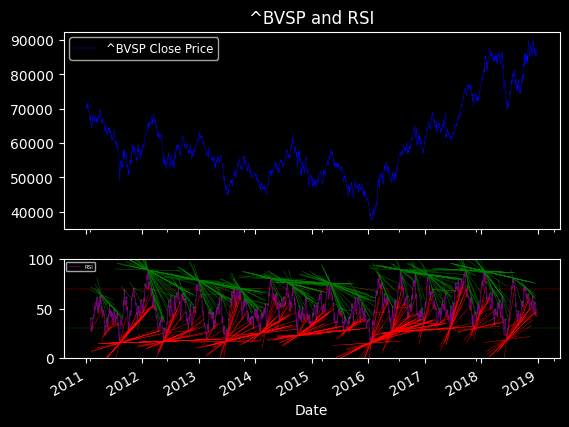

In [434]:
plt.style.use('dark_background')
fig, (ax1, ax3) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# ----------------------------------------------------------------   
# Plotando o preço de fechamento
# ----------------------------------------------------------------   

data['Close'].plot(ax=ax1, color='blue', label=ticker + ' Close Price', linewidth = 0.3)

# ----------------------------------------------------------------   
# Plotando o RSI
# ----------------------------------------------------------------   

data['RSI'].plot(ax=ax3, color='purple', label='RSI', linewidth = 0.5)
ax3.axhline(70, color='red', linestyle='--', linewidth = 0.3)  # Linha de sobrecompra
ax3.axhline(30, color='green', linestyle='--', linewidth = 0.3)  # Linha de sobrevenda

plt.legend()
ax1.set_title(ticker + " and RSI")
ax1.legend(loc='upper left', fontsize='small')
ax3.legend(loc='upper left', fontsize=4)
ax3.set_ylim([0, 100])  # O RSI varia de 0 a 100

# ----------------------------------------------------------------   
# Plotar os topos e fundos no gráfico
# ----------------------------------------------------------------   

for top in tops_df.itertuples():
    # Plotar cada topo no gráfico RSI usando a data correspondente
    ax3.plot(idx[top.top_idx], data['RSI'][top.top_idx], marker='o', color='green', markersize=0.3)

for bottom in bottoms_df.itertuples():
    # Plotar cada fundo no gráfico RSI usando a data correspondente
    ax3.plot(idx[bottom.bottom_idx], data['RSI'][bottom.bottom_idx], marker='o', color='red', markersize=0.3)


# Obter as datas associadas aos valores do RSI
datas = data.index[len(data.index) - len(rsi_values):]

# ----------------------------------------------------------------   
# Plotar as retas de suporte do RSI
# ----------------------------------------------------------------   

for i in range(len(slope_ok_trendlines_suporte_df)):
    row = slope_ok_trendlines_suporte_df.iloc[i]

    x_start = int(row['inicio_janela'])
    y_start = row['support_slope'] * x_start + row['support_intercept']

    # Ajustar y_start se necessário
    if y_start < 0:
        x_start = max(0, min(len(datas) - 1, int(-row['support_intercept'] / row['support_slope'])))
        y_start = row['support_slope'] * x_start + row['support_intercept']

    x_end = int(row['fim_janela'])
    y_end = row['support_slope'] * x_end + row['support_intercept']

    # Ajustar y_end se necessário
    if y_end < 0:
        x_end = max(0, min(len(datas) - 1, int(-row['support_intercept'] / row['support_slope'])))
        y_end = row['support_slope'] * x_end + row['support_intercept']

    # Obter datas de início e fim
    data_start = datas[x_start]
    data_end = datas[x_end]

    # Desenhar o segmento de reta
    ax3.plot([data_start, data_end], [y_start, y_end], color='r', linewidth=0.3)

# ----------------------------------------------------------------


# Obter as datas associadas aos valores do RSI
datas = data.index[len(data.index) - len(rsi_values):]

# ----------------------------------------------------------------   
# Plotar as retas de resistencia do RSI
# ----------------------------------------------------------------   

for i in range(len(slope_ok_trendlines_resistencia_df)):
    row = slope_ok_trendlines_resistencia_df.iloc[i]

    x_start = int(row['inicio_janela'])
    y_start = row['resist_slope'] * x_start + row['resist_intercept']

    # Ajustar y_start se necessário
    if y_start < 0:
        x_start = max(0, min(len(datas) - 1, int(-row['resist_intercept'] / row['resist_slope'])))
        y_start = row['resist_slope'] * x_start + row['resist_intercept']

    x_end = int(row['fim_janela'])
    y_end = row['resist_slope'] * x_end + row['resist_intercept']

    # Ajustar y_end se necessário
    if y_end < 0:
        x_end = max(0, min(len(datas) - 1, int(-row['resist_intercept'] / row['resist_slope'])))
        y_end = row['resist_slope'] * x_end + row['resist_intercept']

    # Obter datas de início e fim
    data_start = datas[x_start]
    data_end = datas[x_end]

    # Desenhar o segmento de reta
    ax3.plot([data_start, data_end], [y_start, y_end], color='green', linewidth=0.3)

# ----------------------------------------------------------------

fig.savefig('meu_grafico_1.png', dpi=300)  # Salva a figura como um arquivo PNG com alta resolução

plt.show()

# ----------------------------------------------------------------



Mapeando as retas suporte para encontrar as que passaram por três bottoms até o fim da janela que criou a reta

In [435]:
mapeados_trendlines_suporte_df = mapear_retas_com_bottoms(bottoms_df, slope_ok_trendlines_suporte_df, distancia_maxima, num_pontos)

mapeados_trendlines_suporte_df.to_csv('dados_csv_produzidos/mapeados_trendlines_suporte.csv', index=True)

Selecionando as retas que passam por (num_pontos=3) pontos de máximo e mínimo até o fim da janela à direita

In [436]:
# Preparando o DataFrame para os resultados consolidados


mapeados_trendlines_suporte_df.to_csv('dados_csv_produzidos/mapeados_trendlines_suporte.csv', index=True)

expurgado_trendlines_suporte_df = mapeados_trendlines_suporte_df[mapeados_trendlines_suporte_df['mapeado'] != 0]

expurgado_trendlines_suporte_df.to_csv('dados_csv_produzidos/expurgado_trendlines_suporte.csv', index=True)



# Preparando o DataFrame para os resultados consolidados
mapeados_trendlines_resistencia_df = mapear_retas_com_tops(tops_df, slope_ok_trendlines_resistencia_df, distancia_maxima, num_pontos)

mapeados_trendlines_resistencia_df.to_csv('dados_csv_produzidos/mapeados_trendlines_resistencia.csv', index=True)

expurgado_trendlines_resistencia_df = mapeados_trendlines_resistencia_df[mapeados_trendlines_resistencia_df['mapeado'] != 0]

expurgado_trendlines_resistencia_df.to_csv('dados_csv_produzidos/expurgado_trendlines_resistencia.csv', index=True)

Plotando o gráfico_2

C:\Users\fabio\AppData\Local\Temp\ipykernel_20724\3546139362.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.plot(idx[top.top_idx], data['RSI'][top.top_idx], marker='o', color='green', markersize=0.3)
C:\Users\fabio\AppData\Local\Temp\ipykernel_20724\3546139362.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.plot(idx[bottom.bottom_idx], data['RSI'][bottom.bottom_idx], marker='o', color='red', markersize=0.3)


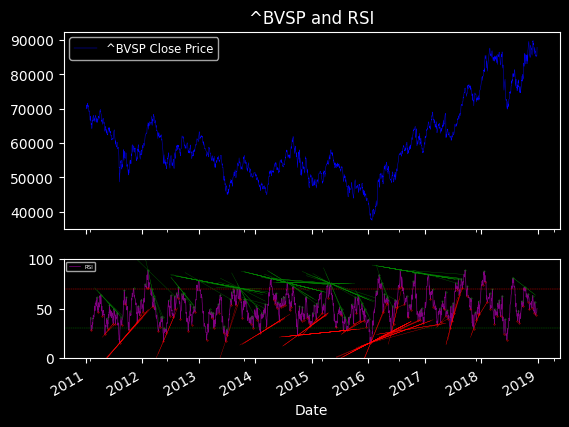

In [437]:
plt.style.use('dark_background')
fig, (ax1, ax3) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# ----------------------------------------------------------------   
# Plotando o preço de fechamento
# ----------------------------------------------------------------   

data['Close'].plot(ax=ax1, color='blue', label=ticker + ' Close Price', linewidth = 0.3)

# ----------------------------------------------------------------   
# Plotando o RSI
# ----------------------------------------------------------------   

data['RSI'].plot(ax=ax3, color='purple', label='RSI', linewidth = 0.5)
ax3.axhline(70, color='red', linestyle='--', linewidth = 0.3)  # Linha de sobrecompra
ax3.axhline(30, color='green', linestyle='--', linewidth = 0.3)  # Linha de sobrevenda

plt.legend()
ax1.set_title(ticker + " and RSI")
ax1.legend(loc='upper left', fontsize='small')
ax3.legend(loc='upper left', fontsize=4)
ax3.set_ylim([0, 100])  # O RSI varia de 0 a 100

# ----------------------------------------------------------------   
# Plotar os topos e fundos no gráfico
# ----------------------------------------------------------------   

for top in tops_df.itertuples():
    # Plotar cada topo no gráfico RSI usando a data correspondente
    ax3.plot(idx[top.top_idx], data['RSI'][top.top_idx], marker='o', color='green', markersize=0.3)

for bottom in bottoms_df.itertuples():
    # Plotar cada fundo no gráfico RSI usando a data correspondente
    ax3.plot(idx[bottom.bottom_idx], data['RSI'][bottom.bottom_idx], marker='o', color='red', markersize=0.3)
    
# Obter as datas associadas aos valores do RSI
datas = data.index[len(data.index) - len(rsi_values):]

# ----------------------------------------------------------------   
# Plotar as retas de suporte do RSI
# ----------------------------------------------------------------   

for i in range(len(expurgado_trendlines_suporte_df)):
    row = expurgado_trendlines_suporte_df.iloc[i]

    x_start = int(row['inicio_janela'])
    y_start = row['support_slope'] * x_start + row['support_intercept']

    # Ajustar y_start se necessário
    if y_start < 0:
        x_start = max(0, min(len(datas) - 1, int(-row['support_intercept'] / row['support_slope'])))
        y_start = row['support_slope'] * x_start + row['support_intercept']

    x_end = min(len(datas)-1, int(row['x_max']))
    y_end = row['support_slope'] * x_end + row['support_intercept']

    # Ajustar y_end se necessário
    if y_end < 0:
        x_end = max(0, min(len(datas) - 1, int(-row['support_intercept'] / row['support_slope'])))
        y_end = row['support_slope'] * x_end + row['support_intercept']

    # Obter datas de início e fim
    data_start = datas[x_start]
    data_end = datas[x_end]

    # Desenhar o segmento de reta
    ax3.plot([data_start, data_end], [y_start, y_end], color='r', linewidth=0.2)

# ----------------------------------------------------------------

for i in range(len(expurgado_trendlines_resistencia_df)):
    row = expurgado_trendlines_resistencia_df.iloc[i]

    x_start = int(row['inicio_janela'])
    y_start = row['resist_slope'] * x_start + row['resist_intercept']

    # Ajustar y_start se necessário
    if y_start < 0:
        x_start = max(0, min(len(datas) - 1, int(-row['resist_intercept'] / row['resist_slope'])))
        y_start = row['resist_slope'] * x_start + row['resist_intercept']

    x_end = min(len(datas)-1, int(row['fim_janela']))
    y_end = row['resist_slope'] * x_end + row['resist_intercept']

    # Ajustar y_end se necessário
    if y_end < 0:
        x_end = max(0, min(len(datas) - 1, int(-row['resist_intercept'] / row['resist_slope'])))
        y_end = row['resist_slope'] * x_end + row['resist_intercept']

    # Obter datas de início e fim
    data_start = datas[x_start]
    data_end = datas[x_end]

    # Desenhar o segmento de reta
    ax3.plot([data_start, data_end], [y_start, y_end], color='green', linewidth=0.2)

# ----------------------------------------------------------------

fig.savefig('meu_grafico_2.png', dpi=300)  # Salva a figura como um arquivo PNG com alta resolução

plt.show()

# ----------------------------------------------------------------

Eliminando as linhas duplicadas

In [438]:

expurgado_trendlines_suporte_df['support_slope_rounded'] = expurgado_trendlines_suporte_df['support_slope'].round(3)

eliminado_trendlines_suporte_df = expurgado_trendlines_suporte_df.groupby(['indice_original_lower_pivot', 'support_slope_rounded']).agg({
    'inicio_janela': 'min',
    'fim_janela': 'min',
    'support_intercept': 'first',
    'num_zeros': 'min'}).reset_index()
eliminado_trendlines_suporte_df.to_csv('dados_csv_produzidos/eliminado_trendlines_suporte.csv', index=True)


eliminado_trendlines_resistencia_df = identifica_retas_similares_resistencia(expurgado_trendlines_resistencia_df)
eliminado_trendlines_resistencia_df.to_csv('dados_csv_produzidos/eliminado_trendlines_resistencia.csv', index=True)

expurgado_trendlines_resistencia_df['resist_slope_rounded'] = expurgado_trendlines_resistencia_df['resist_slope'].round(3)
eliminado_trendlines_resistencia_df = expurgado_trendlines_resistencia_df.groupby(['indice_original_upper_pivot', 'resist_slope_rounded']).agg({
    'inicio_janela': 'min',
    'fim_janela': 'min',
    'resist_intercept': 'first',
    'num_zeros': 'min'}).reset_index()
eliminado_trendlines_resistencia_df.to_csv('dados_csv_produzidos/eliminado_trendlines_resistencia.csv', index=True)



C:\Users\fabio\AppData\Local\Temp\ipykernel_20724\1423709410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expurgado_trendlines_suporte_df['support_slope_rounded'] = expurgado_trendlines_suporte_df['support_slope'].round(3)
c:\Users\fabio\Dropbox\FGV\Curso Estratégias de Trading\Lista 2 PC\Lista-2\trendlines.py:312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reta_similar'] = np.nan
C:\Users\fabio\AppData\Local\Temp\ipykernel_20724\1423709410.py:14: SettingWithCopyWarning: 
A value is trying to 

Checando cruzamento das retas suporte

In [439]:
def cruzou_para_baixo(ind_pontos, slope_reta_suporte, intercept_reta_suporte, break_min, dados_rsi):
    if len(ind_pontos) != 2:
        raise ValueError("A lista ind_pontos deve conter exatamente dois pontos.")

    x1, y1 = ind_pontos[0]
    x2, y2 = ind_pontos[1]

    # Calculando y na reta para os pontos x1 e x2
    y_reta_1 = slope_reta_suporte * x1 + intercept_reta_suporte
    y_reta_2 = slope_reta_suporte * x2 + intercept_reta_suporte

    # Verificando se o primeiro ponto está acima da reta e o segundo abaixo
    primeiro_acima = y1 > y_reta_1
    segundo_abaixo_distante = y2 < y_reta_2 and abs(y2 - y_reta_2) > break_min

    if primeiro_acima and segundo_abaixo_distante:
        # Procurar por x3 entre x1 e x2
        for x in range(int(x1) + 1, int(x2)):
            y3 = dados_rsi.iloc[x]['RSI'] # Acessando o valor de RSI correspondente a x no DataFrame
            y_reta_3 = slope_reta_suporte * x + intercept_reta_suporte
            if y3 < y_reta_3:
                return True, x, y3  # Retorna True e o primeiro x3 encontrado
        return True, x2, y2  # Caso nenhum x3 válido seja encontrado
    else:
        return False, None, None


# -----------------------

def cruzou_para_cima(ind_pontos, slope_reta_resistencia, intercept_reta_resistencia, break_min, dados_rsi):
    if len(ind_pontos) != 2:
        raise ValueError("A lista ind_pontos deve conter exatamente dois pontos.")

    x1, y1 = ind_pontos[0]
    x2, y2 = ind_pontos[1]

    # Calculando y na reta para os pontos x1 e x2
    y_reta_1 = slope_reta_resistencia * x1 + intercept_reta_resistencia
    y_reta_2 = slope_reta_resistencia * x2 + intercept_reta_resistencia

    # Verificando se o primeiro ponto está acima da reta e o segundo abaixo

    
    primeiro_abaixo = y1 < y_reta_1
    segundo_acima_distante = y2 > y_reta_2 and abs(y2 - y_reta_2) > break_min

    if primeiro_abaixo and segundo_acima_distante:
        # Procurar por x3 entre x1 e x2
        for x in range(int(x1) + 1, int(x2)):
            y3 = dados_rsi.iloc[x]['RSI'] # Acessando o valor de RSI correspondente a x no DataFrame
            y_reta_3 = slope_reta_resistencia * x + intercept_reta_resistencia
            if y3 > y_reta_3:
                return True, x, y3  # Retorna True e o primeiro x3 encontrado
        return True, x2, y2  # Caso nenhum x3 válido seja encontrado
    else:
        return False, None, None


# --------------------------------------------------------
# Encontrando breaks para baixo nas retas suporte
# --------------------------------------------------------
# DataFrame para armazenar os resultados
breaks_down_df = pd.DataFrame(columns=['ponto', 'evento', 'reta' ,'x_rompimento', 'y_rompimento', 'inicio_janela', 'fim_janela'])

# Processamento
for i in range(pontos_para_tras, len(rsi_df)):
    # Criando a lista de pontos para a linha atual
    pontos = [(i - pontos_para_tras, rsi_df.iloc[i - pontos_para_tras]['RSI']), 
          (i, rsi_df.iloc[i]['RSI'])]


    for idx, linha in eliminado_trendlines_suporte_df.iterrows():
        # Extraindo os valores da reta e a fim_janela
        fim_janela = linha['fim_janela']
        inicio_janela = linha['inicio_janela']

        # Verificando se i é maior do que fim_janela + ordem
        if i > fim_janela + ordem*0:
            slope = linha['support_slope_rounded']
            intercept = linha['support_intercept']
            # Verificando cruzamento
            cruzou, x_rompimento, y_rompimento = cruzou_para_baixo( pontos, slope, intercept, break_min, rsi_df)
            if cruzou:
                    breaks_down_df = breaks_down_df._append({'ponto': i,
                                                    'evento': 1,
                                                    'reta': idx,
                                                    'x_rompimento': x_rompimento,
                                                    'y_rompimento': y_rompimento,
                                                    'inicio_janela':inicio_janela,
                                                    'fim_janela': fim_janela}, ignore_index=True)
                    

primeiros_breaks_down_df = breaks_down_df.loc[breaks_down_df.groupby('reta')['x_rompimento'].idxmin()]
primeiros_breaks_down_df = primeiros_breaks_down_df.loc[primeiros_breaks_down_df.groupby('x_rompimento')['fim_janela'].idxmin()]

primeiros_breaks_down_df.to_csv('dados_csv_produzidos/breaks_down.csv', index=True)

# --------------------------------------------------------
# Encontrando breaks para cima nas retas de resistencia
# --------------------------------------------------------

# DataFrame para armazenar os resultados
breaks_up_df = pd.DataFrame(columns=['ponto', 'evento', 'reta' ,'x_rompimento', 'y_rompimento', 'inicio_janela', 'fim_janela'])

for i in range(pontos_para_tras, len(rsi_df)):
    # Criando a lista de pontos para a linha atual
    pontos = [(i - pontos_para_tras, rsi_df.iloc[i - pontos_para_tras]['RSI']), 
          (i, rsi_df.iloc[i]['RSI'])]

    for idx, linha in eliminado_trendlines_resistencia_df.iterrows():
        # Extraindo os valores da reta e a fim_janela
        fim_janela = linha['fim_janela']
        inicio_janela = linha['inicio_janela']

        # Verificando se i é maior do que fim_janela + ordem
        if i > fim_janela + ordem:
            slope = linha['resist_slope_rounded']
            intercept = linha['resist_intercept']
            # Verificando cruzamento
            cruzou, x_rompimento, y_rompimento = cruzou_para_cima( pontos, slope, intercept, break_min, rsi_df)
            if cruzou:
                breaks_up_df = breaks_up_df._append({'ponto': i,
                                                'evento': 2,
                                                'reta': idx,
                                                'x_rompimento': x_rompimento,
                                                'y_rompimento': y_rompimento,
                                                'inicio_janela':inicio_janela,
                                                'fim_janela': fim_janela}, ignore_index=True)

breaks_up_df.to_csv('dados_csv_produzidos/breaks_up.csv', index=True)

primeiros_breaks_up_df = breaks_up_df.loc[breaks_up_df.groupby('reta')['x_rompimento'].idxmin()]
primeiros_breaks_up_df = primeiros_breaks_up_df.loc[primeiros_breaks_up_df.groupby('x_rompimento')['fim_janela'].idxmin()]

primeiros_breaks_up_df.to_csv('dados_csv_produzidos/breaks_up.csv', index=True)
                   



C:\Users\fabio\AppData\Local\Temp\ipykernel_20724\3774446714.py:84: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  breaks_down_df = breaks_down_df._append({'ponto': i,
C:\Users\fabio\AppData\Local\Temp\ipykernel_20724\3774446714.py:122: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  breaks_up_df = breaks_up_df._append({'ponto': i,


Plotando os sinais

C:\Users\fabio\AppData\Local\Temp\ipykernel_20724\4181925658.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.plot(idx[top.top_idx], data['RSI'][top.top_idx], marker='o', color='green', markersize=0.3)
C:\Users\fabio\AppData\Local\Temp\ipykernel_20724\4181925658.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.plot(idx[bottom.bottom_idx], data['RSI'][bottom.bottom_idx], marker='o', color='red', markersize=0.3)


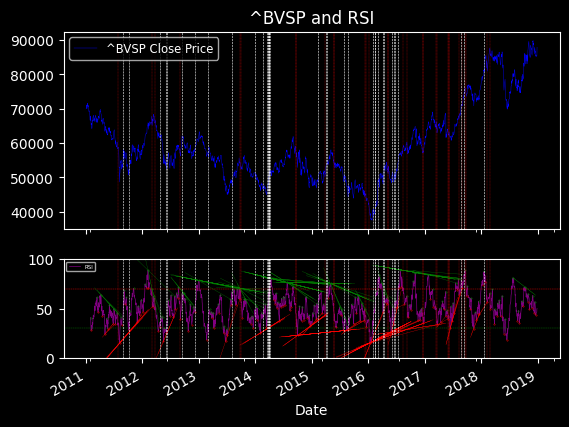

In [440]:

plt.style.use('dark_background')
fig, (ax1, ax3) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# ----------------------------------------------------------------   
# Plotando o preço de fechamento
# ----------------------------------------------------------------   

data['Close'].plot(ax=ax1, color='blue', label=ticker + ' Close Price', linewidth = 0.3)

# ----------------------------------------------------------------   
# Plotando o RSI
# ----------------------------------------------------------------   

data['RSI'].plot(ax=ax3, color='purple', label='RSI', linewidth = 0.5)
ax3.axhline(70, color='red', linestyle='--', linewidth = 0.3)  # Linha de sobrecompra
ax3.axhline(30, color='green', linestyle='--', linewidth = 0.3)  # Linha de sobrevenda

plt.legend()
ax1.set_title(ticker + " and RSI")
ax1.legend(loc='upper left', fontsize='small')
ax3.legend(loc='upper left', fontsize=4)
ax3.set_ylim([0, 100])  # O RSI varia de 0 a 100

# ----------------------------------------------------------------   
# Plotar os topos e fundos no gráfico
# ----------------------------------------------------------------   

idx = data.index

for top in tops_df.itertuples():
    # Plotar cada topo no gráfico RSI usando a data correspondente
    ax3.plot(idx[top.top_idx], data['RSI'][top.top_idx], marker='o', color='green', markersize=0.3)

for bottom in bottoms_df.itertuples():
    # Plotar cada fundo no gráfico RSI usando a data correspondente
    ax3.plot(idx[bottom.bottom_idx], data['RSI'][bottom.bottom_idx], marker='o', color='red', markersize=0.3)
    
# Obter as datas associadas aos valores do RSI
datas = data.index[len(data.index) - len(rsi_values):]

# ----------------------------------------------------------------   
# Plotar as retas de suporte do RSI
# ----------------------------------------------------------------   

for i in range(len(expurgado_trendlines_suporte_df)):
    row = expurgado_trendlines_suporte_df.iloc[i]

    x_start = int(row['inicio_janela'])
    y_start = row['support_slope'] * x_start + row['support_intercept']

    # Ajustar y_start se necessário
    if y_start < 0:
        x_start = max(0, min(len(datas) - 1, int(-row['support_intercept'] / row['support_slope'])))
        y_start = row['support_slope'] * x_start + row['support_intercept']

    x_end = min(len(datas)-1, int(row['x_max']))
    y_end = row['support_slope'] * x_end + row['support_intercept']

    # Ajustar y_end se necessário
    if y_end < 0:
        x_end = max(0, min(len(datas) - 1, int(-row['support_intercept'] / row['support_slope'])))
        y_end = row['support_slope'] * x_end + row['support_intercept']

    # Obter datas de início e fim
    data_start = datas[x_start]
    data_end = datas[x_end]

    # Desenhar o segmento de reta
    ax3.plot([data_start, data_end], [y_start, y_end], color='r', linewidth=0.2)

# ----------------------------------------------------------------

for i in range(len(expurgado_trendlines_resistencia_df)):
    row = expurgado_trendlines_resistencia_df.iloc[i]

    x_start = int(row['inicio_janela'])
    y_start = row['resist_slope'] * x_start + row['resist_intercept']

    # Ajustar y_start se necessário
    if y_start < 0:
        x_start = max(0, min(len(datas) - 1, int(-row['resist_intercept'] / row['resist_slope'])))
        y_start = row['resist_slope'] * x_start + row['resist_intercept']

    x_end = min(len(datas)-1, int(row['fim_janela']))
    y_end = row['resist_slope'] * x_end + row['resist_intercept']

    # Ajustar y_end se necessário
    if y_end < 0:
        x_end = max(0, min(len(datas) - 1, int(-row['resist_intercept'] / row['resist_slope'])))
        y_end = row['resist_slope'] * x_end + row['resist_intercept']

    # Obter datas de início e fim
    data_start = datas[x_start]
    data_end = datas[x_end]

    # Desenhar o segmento de reta
    ax3.plot([data_start, data_end], [y_start, y_end], color='green', linewidth=0.2)

# ----------------------------------------------------------------

for _, row in primeiros_breaks_down_df.iterrows():
    x_rompimento = row['x_rompimento']

    # Obter a data correspondente ao índice x_rompimento
    data_x_rompimento = data.index[int(x_rompimento)]

    # Adicionar linha vertical azul
    ax1.axvline(x=data_x_rompimento, color='red', linestyle='--', linewidth=0.2)
    ax3.axvline(x=data_x_rompimento, color='red', linestyle='--', linewidth=0.2)

# ----------------------------------------------------------------

for _, row in primeiros_breaks_up_df.iterrows():
    x_rompimento = row['x_rompimento']

    # Obter a data correspondente ao índice x_rompimento
    data_x_rompimento = data.index[int(x_rompimento)]

    # Adicionar linha vertical azul
    ax1.axvline(x=data_x_rompimento, color='white', linestyle='--', linewidth=0.4)
    ax3.axvline(x=data_x_rompimento, color='white', linestyle='--', linewidth=0.4)
# ----------------------------------------------------------------


fig.savefig('meu_grafico_3.png', dpi=300)  # Salva a figura como um arquivo PNG com alta resolução

plt.show()

# ----------------------------------------------------------------

Juntando os breaks

In [441]:
# Concatenar os dois DataFrames
breaks_df = pd.concat([primeiros_breaks_down_df, primeiros_breaks_up_df])

# Ordenar o DataFrame resultante pela coluna 'ponto'
breaks_df = breaks_df.sort_values(by='ponto')

# Resetar o índice se necessário
breaks_df = breaks_df.reset_index(drop=True)

breaks_df.to_csv('dados_csv_produzidos/breaks.csv', index=True)

Criando o Backtest

In [442]:
def estrategia(ind, valor, pos_ant, ini_posicao_ant, valor_posicao_ant, brs_df, sl, tp):
    
    # Verificar se existe uma linha em brs_df com 'ponto' igual a ind
    linha = brs_df[brs_df['ponto'] == ind]

    if pos_ant == 0:
        if not linha.empty:
            evento = linha.iloc[0]['evento']
            if evento == 1:
                return -1, ind, valor
            elif evento == 2:
                    return 1, ind, valor
            else:
                return 0, None, None

    elif pos_ant == -1:
        if not linha.empty:
            evento = linha.iloc[0]['evento']
            if evento == 1:
                if valor/valor_posicao_ant-1 > tp:
                    return 0, None, valor
                elif valor/valor_posicao_ant-1 < sl:
                    return 0, None, valor
                else:
                    return -1, ini_posicao_ant, valor_posicao_ant
            elif evento == 2:
                return 0, None, valor
        else:
            return -1, ini_posicao_ant, valor_posicao_ant

    elif pos_ant == 1:
        if not linha.empty:
            evento = linha.iloc[0]['evento']
            if evento == 2:
                if valor - valor_posicao_ant > tp:
                    return 0, None, valor
                elif valor - valor_posicao_ant < sl:
                    return 0, None, valor
                else:
                    return 1, ini_posicao_ant, valor_posicao_ant
            elif evento == 1:
                return 0, None, valor
        else:
            return 1, ini_posicao_ant, valor_posicao_ant

    # Para qualquer outro caso
    return pos_ant, ini_posicao_ant, valor_posicao_ant

data = data.reset_index(drop=True)

# Inicializar as colunas
data['posicao'] = 0
data['ini_posicao'] = None
data['valor_posicao'] = None

# Valores iniciais
pos_ant = 0
ini_posicao_ant = None
valor_posicao_ant = None

# Iterar sobre o DataFrame
for ind in range(1, len(data)):  # Começa a partir da segunda linha
    valor = data.loc[ind, 'Close']
    pos_ant, ini_posicao_ant, valor_posicao_ant = estrategia(ind, valor, pos_ant, ini_posicao_ant, valor_posicao_ant, breaks_df, sl, pt)

    # Atualizar as colunas no DataFrame
    data.at[ind, 'posicao'] = pos_ant
    data.at[ind, 'ini_posicao'] = ini_posicao_ant
    data.at[ind, 'valor_posicao'] = valor_posicao_ant

data.to_csv('dados_csv_produzidos/back_test_df.csv', index=True)

Calculando Quota da Estratégia

In [443]:
# Calcula 'retorno_ind' como antes
data['retorno_ind'] = data['Close'].pct_change()
data['retorno_ind'].iloc[0] = 0

# Utiliza o 'retorno_ind' da linha seguinte e 'posicao' da linha atual
data['retorno_estrategia'] = data['retorno_ind'].shift(-1) * data['posicao']

# Para a última linha, como não há 'retorno_ind' seguinte, você pode definir 'retorno_estrategia' como 0 (ou outro valor conforme a necessidade)
data['retorno_estrategia'].iloc[-1] = 0

# Calcula 'Quota' como antes
data['Quota'] = 100
for i in range(1, len(data)):
    data['Quota'].iloc[i] = data['Quota'].iloc[i - 1] * (1 + data['retorno_estrategia'].iloc[i])

data['retorno_max'] = data['Quota'].cummax()/100-1

data['DD'] = (data['Quota']/100)/(data['retorno_max']+1)-1

# Inicializa a coluna 'DDD' com zeros
data['DDD'] = 0

# Itera pelo DataFrame, aplicando a lógica desejada para a coluna 'DDD'
for i in range(1, len(data)):
    
    if abs(data['DD'].iloc[i])<0.0000001:
        data['DDD'].iloc[i] = 0
    else:
        data['DDD'].iloc[i] = data['DDD'].iloc[i - 1] + 1

data.to_csv('dados_csv_produzidos/quotas.csv', index=True)

print("DD Mínimo :" + str(data['DD'].min()))
print("DDD Máximo :" + str(data['DDD'].max()))
print("Retorno Acumulado Final: "+str(data['Quota'].iloc[len(data)-1]-100)+"%")



C:\Users\fabio\AppData\Local\Temp\ipykernel_20724\3669126539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['retorno_ind'].iloc[0] = 0
C:\Users\fabio\AppData\Local\Temp\ipykernel_20724\3669126539.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['retorno_estrategia'].iloc[-1] = 0
C:\Users\fabio\AppData\Local\Temp\ipykernel_20724\3669126539.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quota'].iloc[i] = dat

DD Mínimo :-0.35777700194004847
DDD Máximo :498
Retorno Acumulado Final: 39.71513287292976%
